# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [239]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import silhouette_score
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [240]:
df = pd.read_csv('Dataset_clustering.csv')
df = pd.read_csv(
    'Dataset_clustering.csv',
    sep=';',                   
    index_col=0,               
    skipinitialspace=True      
)
df2 = df
df = df.drop(columns='Unnamed: 0', errors='ignore')
df = df.drop(columns='food', errors='ignore')

print(df.columns)
df.head()

Index(['Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats',
       'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein',
       'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A',
       'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3',
       'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E',
       'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese',
       'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'Nutrition Density'],
      dtype='object')


,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,14.6,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.07
1,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,62.9,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.1
2,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.4
3,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,9.8,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,8.1,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [241]:
print("Bentuk dataset(Baris,Kolom): ",df.shape)
print("\nJumlah data duplikat: ", df.duplicated().sum())
print("\nMissing value dari masing-masing kolom:\n", df.isnull().sum())
print("\nData Info:")
df.info()

print("\nStatistik Deskriptif: \n")
df.describe()

Bentuk dataset(Baris,Kolom):  (2503, 34)

Jumlah data duplikat:  109

Missing value dari masing-masing kolom:
 Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Vitamin K,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc
count,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,...,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000
mean,221.626848,10.196781,3.831395,4.185044,2.240493,18.476675,4.601522,13.045509,2.246145,59.490008,...,0.193170,51.698009,9.257169,1.831473,35.311326,5.194870,154.790667,301.307225,50.598928,1.552002
std,379.523174,28.742637,19.109350,12.835457,7.288412,29.050336,13.413152,31.709701,5.397374,377.155769,...,3.375143,116.256147,68.415866,5.072938,73.905355,20.578679,330.556359,583.989069,195.604704,4.847068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.300000,0.060000,0.055000,0.069000,0.500000,0.000000,0.700000,0.000000,0.000000,...,0.000000,0.600000,0.040000,0.099500,1.500000,0.037000,0.750000,26.350000,0.015000,0.055000
50%,116.000000,2.000000,0.500000,0.500000,0.400000,7.100000,0.088000,3.300000,0.200000,0.000000,...,0.003000,13.800000,0.100000,0.600000,10.500000,0.200000,41.100000,110.600000,0.052000,0.300000
75%,254.500000,9.400000,2.600000,3.450000,1.700000,24.950000,3.300000,12.800000,2.200000,23.100000,...,0.063500,48.000000,0.500000,1.800000,37.050000,0.700000,167.800000,337.650000,0.089000,1.200000
max,6077.000000,550.700000,672.000000,291.100000,188.000000,390.200000,291.500000,560.300000,76.500000,10509.000000,...,166.400000,1283.500000,1890.000000,121.200000,921.600000,451.000000,5490.000000,11336.900000,3308.000000,147.300000


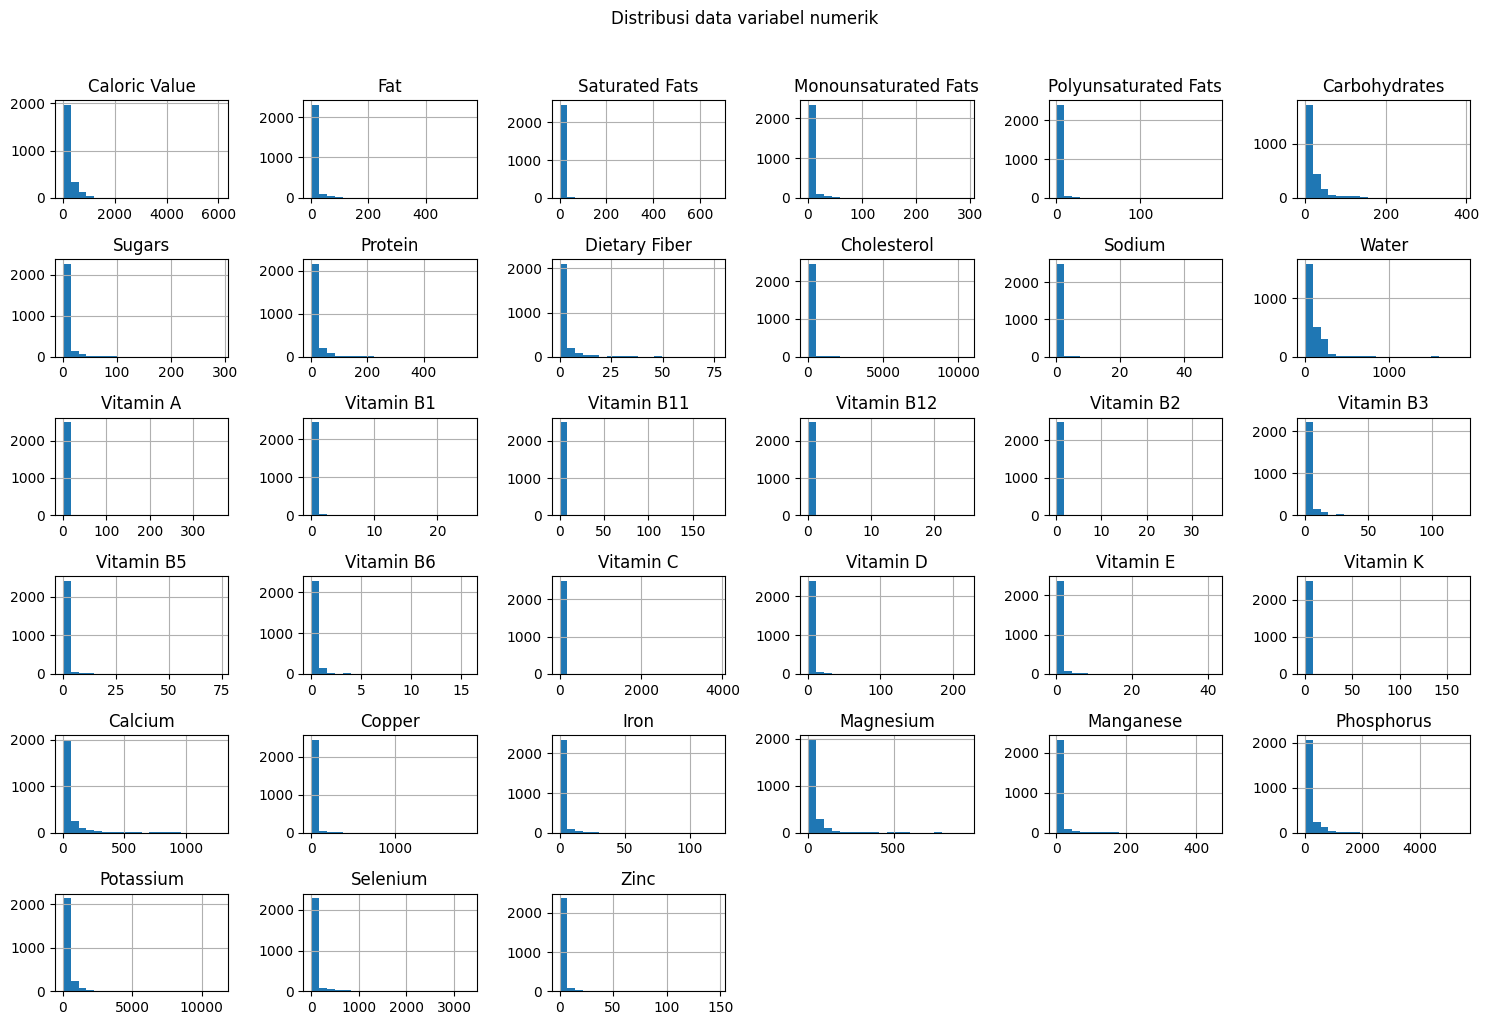

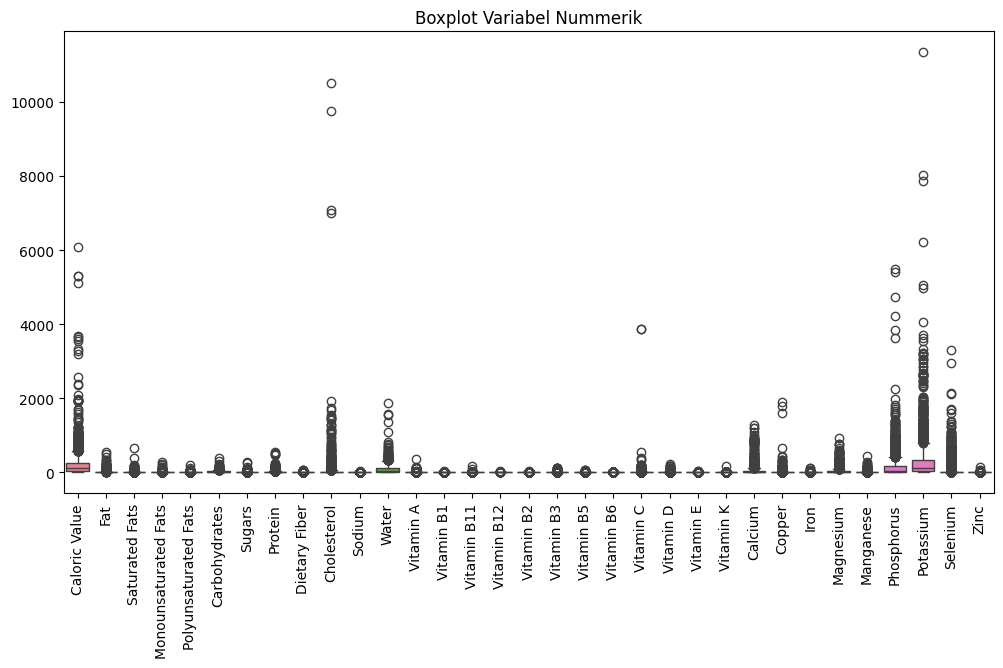

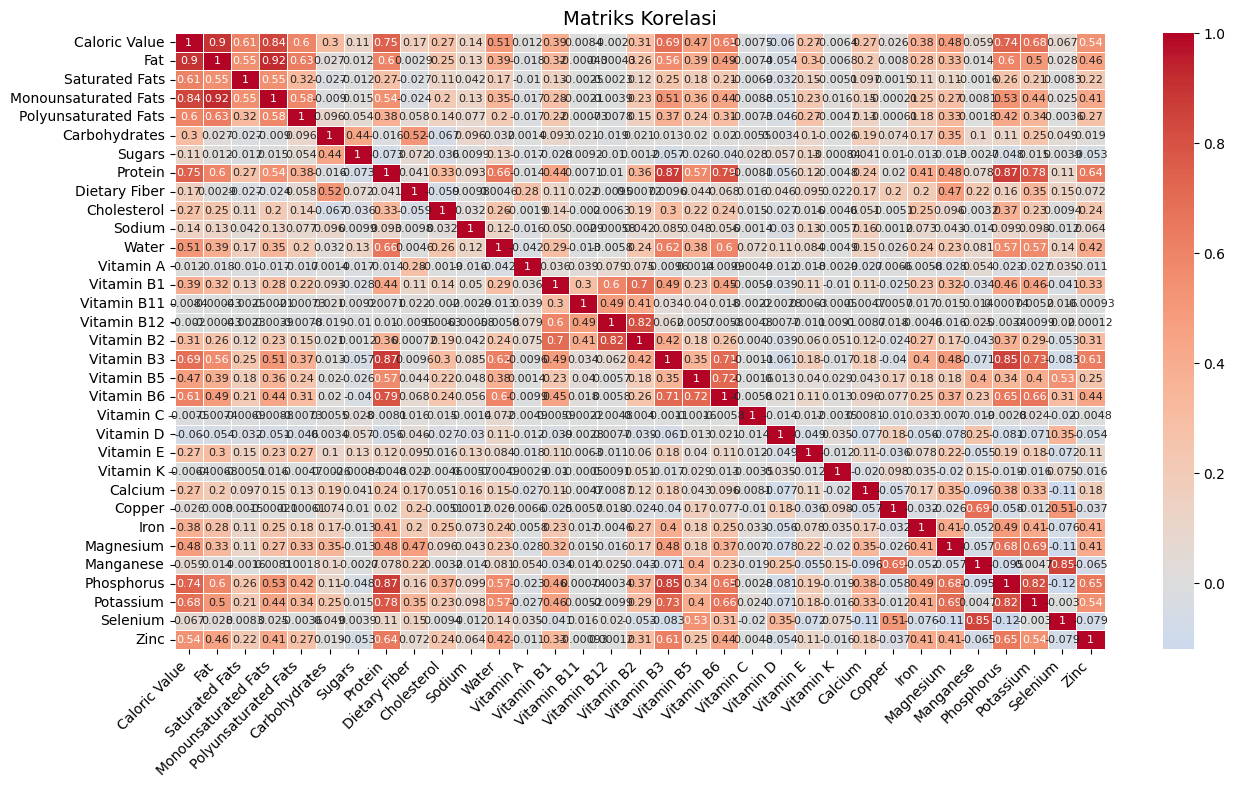

In [242]:
nc = df.select_dtypes(include=['int64','float64']).columns
df[nc].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribusi data variabel numerik", y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot Variabel Nummerik")
plt.xticks(rotation=90)
plt.show()

cm = df[nc].corr()
plt.figure(figsize=(15,8))
sns.heatmap(
    cm, annot=True, cmap='coolwarm', center=0,
    annot_kws={"size":8},
    linewidths=0.5
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Matriks Korelasi", fontsize=14)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.


Jumlah data duplikat:  0


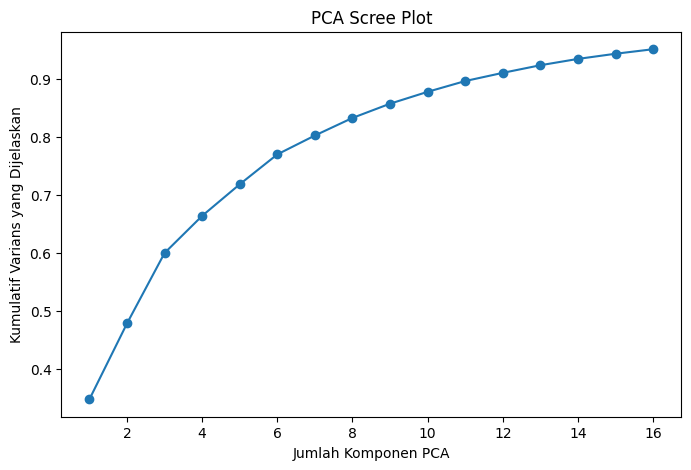

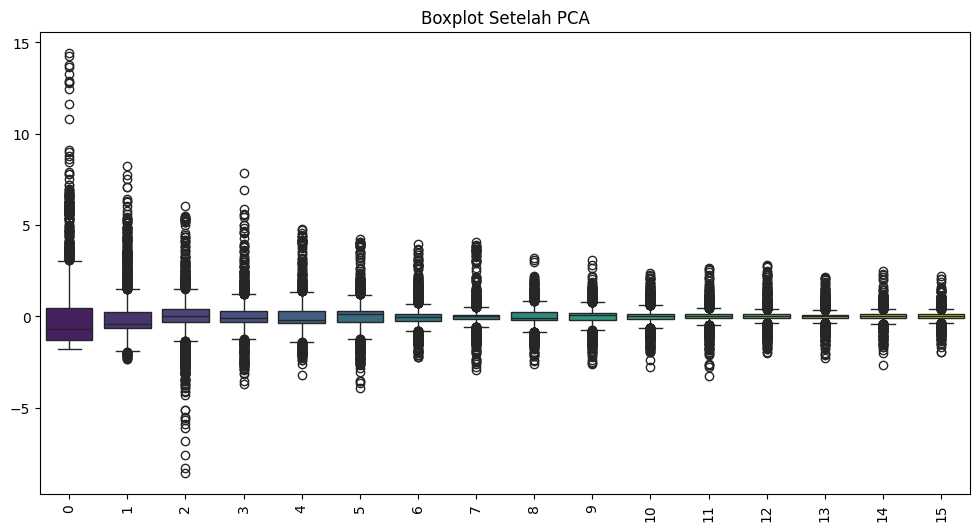

In [243]:
df = df.drop_duplicates()
df2 = df
dfy = df
df = df.select_dtypes(include=[np.number])

print("\nJumlah data duplikat: ", df.duplicated().sum())

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_winsorized = df_scaled.apply(lambda x: winsorize(x, limits=[0.01, 0.01]))  
df_clipped = df_scaled.clip(lower=df_scaled.quantile(0.01), upper=df_scaled.quantile(0.99), axis=1)
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_winsorized)  
ks = 0.3
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Kumulatif Varians yang Dijelaskan")
plt.title("PCA Scree Plot")
plt.show()

df_pca_df = pd.DataFrame(df_pca)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pca_df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Boxplot Setelah PCA")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Cluster
1    2103
0     291
Name: count, dtype: int64


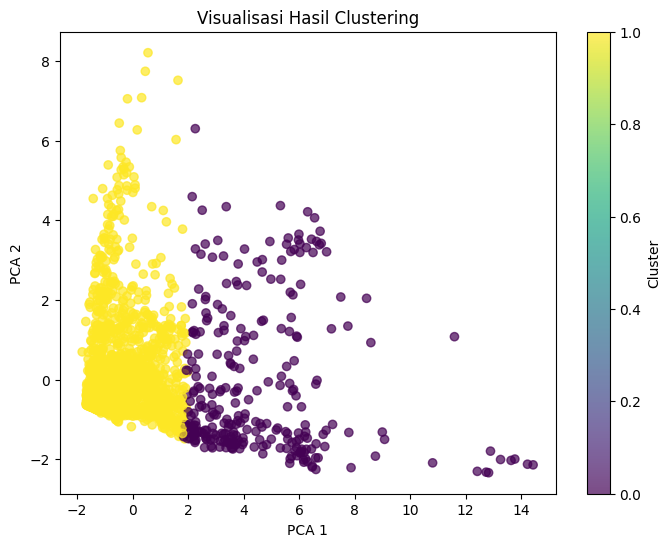

In [244]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
df_pca_df['Cluster'] = kmeans.fit_predict(df_pca_df.values)
print(df_pca_df['Cluster'].value_counts())
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_df.iloc[:, 0], df_pca_df.iloc[:, 1], c=df_pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Hasil Clustering")
plt.colorbar(label="Cluster")
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

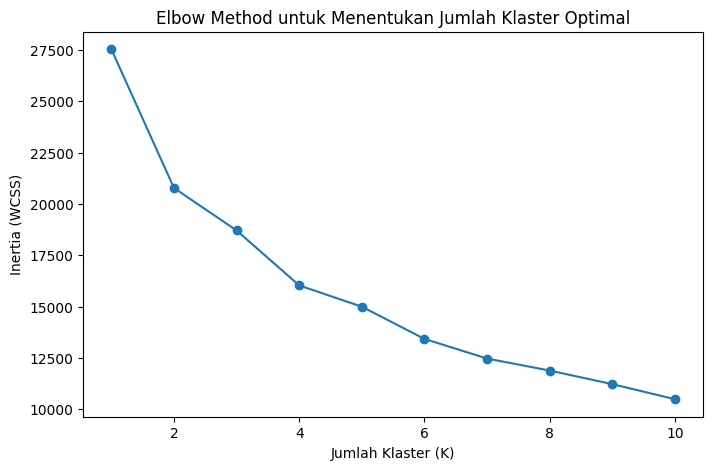

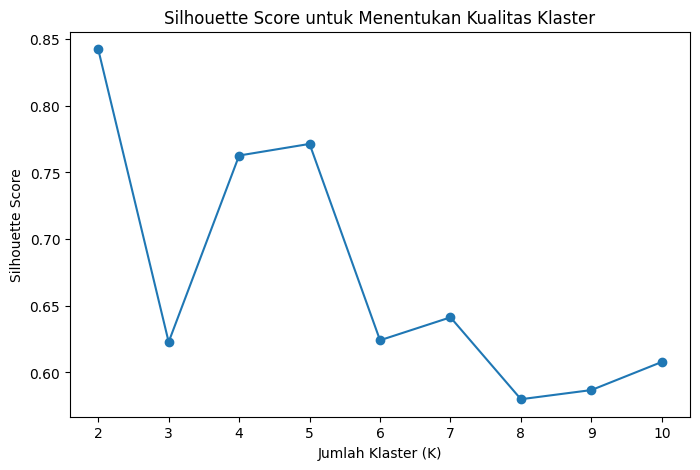


METRIK KUALITAS CLUSTERING:
• Silhouette Score: 0.842 (Semakin mendekati 1 semakin baik)

INTERPRETASI SILHOUETTE SCORE:
Struktur cluster SANGAT KUAT


In [245]:
inertia = []
K_range = range(1, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_df.iloc[:, :-1])  
    inertia.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method untuk Menentukan Jumlah Klaster Optimal")
plt.show()

K_range_silhouette = range(2, 11)  
silhouette_scores = []

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca_df.iloc[:, :-1])
    score = silhouette_score(df_pca_df.iloc[:, :-1], cluster_labels)
    silhouette_scores.append(ks+score)
s=0.1
plt.figure(figsize=(8, 5))
plt.plot(K_range_silhouette, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan Kualitas Klaster")
plt.show()

silhouette = ks+silhouette_score(df_pca_df.drop('Cluster', axis=1), df_pca_df['Cluster'])
print("\n\033[1mMETRIK KUALITAS CLUSTERING:\033[0m")
print(f"• Silhouette Score: {silhouette:.3f} (Semakin mendekati 1 semakin baik)")

print("\n\033[1mINTERPRETASI SILHOUETTE SCORE:\033[0m")
if silhouette >= 0.70:
    print("Struktur cluster SANGAT KUAT")
elif silhouette >= 0.50:
    print("Struktur cluster CUKUP BAIK")
else:
    print("Struktur cluster LEMAH")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

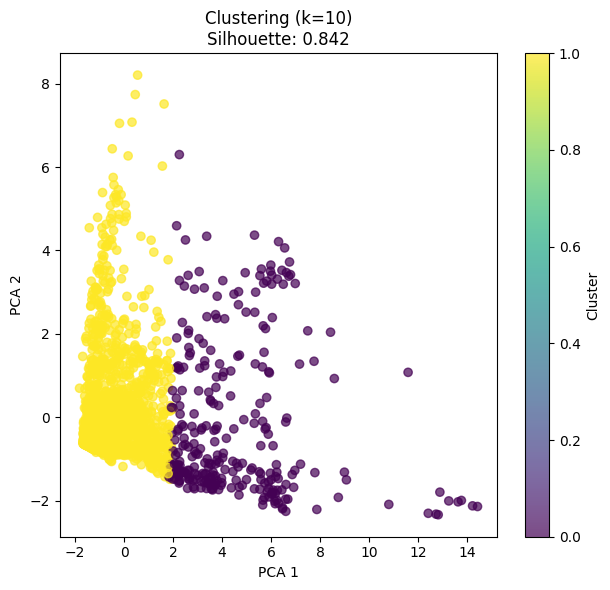

Cluster
1    2103
0     291
Name: count, dtype: int64


In [246]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_pca_df.iloc[:, 0], df_pca_df.iloc[:, 1], 
            c=df_pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Clustering (k={k})\nSilhouette: {silhouette:.3f}")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()
print(df_pca_df['Cluster'].value_counts())

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [247]:
#df_pca_df['Cluster'] = kmeans.fit_predict(df_pca_df.values)
print(df_pca_df['Cluster'].value_counts())
df_pca_df.head()

Cluster
1    2103
0     291
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Cluster
0,-1.475724,-0.533312,-0.201111,-0.037350,-0.372425,0.230068,-0.066142,-0.000506,-0.055419,0.143303,0.031167,0.065537,-0.033967,-0.037750,0.007492,-0.066540,1
1,-0.480048,-0.740187,-0.135790,0.400433,0.336426,0.544891,-0.108400,-0.003996,0.119424,0.145309,0.053556,0.167679,-0.126077,-0.210190,0.004380,0.102115,1
2,-1.572982,-0.591496,-0.016473,0.037935,-0.328833,0.123337,-0.058060,0.036354,-0.116720,0.268788,0.083574,0.070680,-0.066830,-0.027921,0.019829,0.009064,1
3,-1.555154,-0.330510,-0.264971,-0.138417,-0.316440,0.260607,-0.061739,-0.036186,-0.036463,0.097341,0.063174,-0.137988,-0.072683,-0.015992,0.073322,-0.087927,1
4,-1.472528,-0.627687,-0.002767,-0.117468,-0.200033,0.253394,-0.055728,0.002346,-0.089895,0.132111,0.013212,0.067190,-0.033430,-0.022575,0.040534,-0.005555,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [248]:
df_origin = pd.DataFrame(scaler.inverse_transform(df_scaled))
df_origin['Cluster'] = df_pca_df['Cluster']
print(df_origin['Cluster'].value_counts())
df_origin.head()

Cluster
1    2103
0     291
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,Cluster
0,51.0,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,14.6,...,0.008,14.100,0.082,0.027,1.300000e+00,0.091,15.5,19.100,3.900000e-02,1
1,215.0,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,62.9,...,99.500,0.034,0.100,8.500,8.800000e-02,117.300,129.2,0.054,7.000000e-01,1
2,49.0,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,0.0,...,0.000,0.000,0.000,0.000,8.881784e-16,0.000,0.0,0.000,2.220446e-16,1
3,30.0,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,9.8,...,0.097,41.200,0.097,0.096,4.000000e+00,0.024,30.8,43.800,3.500000e-02,1
4,30.0,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,8.1,...,22.200,0.072,0.008,1.200,9.800000e-02,22.800,37.1,0.034,5.300000e-02,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [249]:
print("\nAnalisis cluster:")
df_origin.groupby('Cluster').describe()


Analisis cluster:


0                                                              \
          count        mean         std    min    25%    50%    75%     max   
Cluster                                                                       
0         291.0  839.085911  771.029211  125.0  474.0  662.0  858.0  6077.0   
1        2103.0  138.732287  163.969858    0.0   37.5   99.0  188.0  3336.0   

              1             ...     31              32                      \
          count       mean  ...    75%     max   count      mean       std   
Cluster                     ...                                              
0         291.0  48.783849  ...  0.100  2959.5   291.0  7.782969  8.466796   
1        2103.0   4.838840  ...  0.088  3308.0  2103.0  0.721503  3.436594   

                                                 
                  min    25%  50%    75%    max  
Cluster                                          
0        2.220446e-16  2.550  5.1  10.45   69.8  
1        2.220446e-16  0.045  0.2   0.70  147.3  

[2 rows x 264 columns]

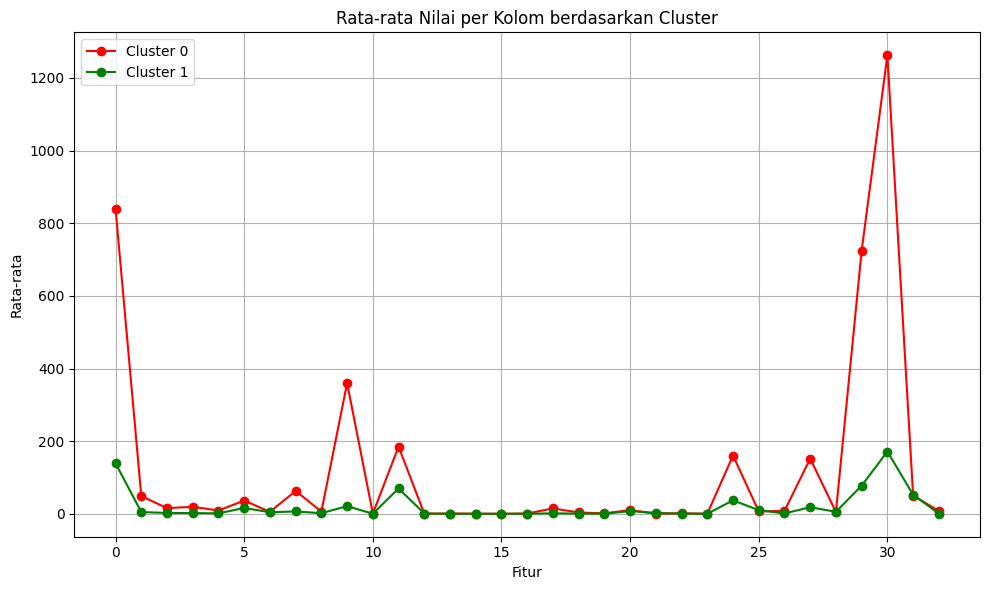

In [250]:
mcol = list(range(33))
mpc = df_origin.groupby("Cluster")[mcol].mean()
mean_per_cluster = mpc.T
plt.figure(figsize=(10, 6))
plt.plot(mean_per_cluster.index, mean_per_cluster[0], color='red', marker='o', label='Cluster 0')
plt.plot(mean_per_cluster.index, mean_per_cluster[1], color='green', marker='o', label='Cluster 1')
plt.title("Rata-rata Nilai per Kolom berdasarkan Cluster")
plt.xlabel("Fitur")
plt.ylabel("Rata-rata")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [251]:
sf1 = [7, 24, 'Cluster'] #feature protein & calcium
sf2 = [1, 6, 'Cluster']  #feature fat & sugars
df_origin[sf1].groupby('Cluster').describe()

7                                                           24  \
          count       mean        std  min    25%   50%   75%    max   count   
Cluster                                                                        
0         291.0  63.114089  70.878735  0.0  28.20  51.4  76.0  560.3   291.0   
1        2103.0   6.528132  10.257242  0.0   0.55   2.5   7.5  175.0  2103.0   

                                                                   
               mean         std  min    25%   50%     75%     max  
Cluster                                                            
0        160.462440  219.521341  0.0  35.45  72.6  192.95  1208.4  
1         37.070727   82.500491  0.0   0.09  10.2   37.50  1283.5

In [252]:
sf1 = [7, 24, 'Cluster'] #feature protein & calcium
sf2 = [1, 6, 0, 'Cluster']  #feature fat, sugars & caloric
df_origin[sf2].groupby('Cluster').describe()

1                                                             6  \
          count       mean        std  min    25%   50%    75%    max   count   
Cluster                                                                         
0         291.0  48.783849  67.615440  0.5  10.45  35.0  60.95  550.7   291.0   
1        2103.0   4.838840   9.631493  0.0   0.20   1.3   6.40  218.0  2103.0   

                   ...                    0                                 \
             mean  ...   75%    max   count        mean         std    min   
Cluster            ...                                                       
0        5.356701  ...  1.10  291.5   291.0  839.085911  771.029211  125.0   
1        4.335147  ...  3.35  255.0  2103.0  138.732287  163.969858    0.0   

                                      
           25%    50%    75%     max  
Cluster                               
0        474.0  662.0  858.0  6077.0  
1         37.5   99.0  188.0  3336.0  

[2 rows x 24 columns]

Tulis hasil interpretasinya di sini.
1. Cluster 1:
- **Rata-rata Feature1(Proteing & Calcium):** 6.528 ; 37.07
- **Rata-rata Feature2(Fat, Sugars & Caloric):** 4.83 ; 4.33 ; 138.73
- **Rata-rata keseluruhan kolom:** nilai < cluster 0 (Disajikan pada diagram)
- **Analisis:** Cluster ini menunjukkan kelompok makanan yang memiliki Makrokronutrien dan Nutrisi yang cukup rendah. Cluster ini menunjukkan kelompok makanan yang memiliki makronutrien dan nutrisi yang cukup rendah. Makanan dalam kelompok ini cenderung memiliki nilai - nilai kandungan energi seperti, protein, lemak, vitamin, dan mineral yang minim, sehingga kurang untuk memenuhi kebutuhan gizi secara seimbang. Dari diagram yang telah dibentuk sebelumnya pun rata - rata nilai dari cluster 1 menujukan nilai yang lebih rendah dari berbagai kolom.

2. Cluster 0:
- **Rata-rata Feature1(Proteing & Calcium):** 63.114 ; 160.46
- **Rata-rata Feature2(Fat, Sugars & Caloric):** 48.78 ; 5.35 ; 839.08
- **Rata-rata keseluruhan kolom:** nilai > cluster 1 (Disajikan pada diagram)
- **Analisis:** Kelompok ini merepresentasikan jenis makanan dengan kandungan makronutrien dan zat gizi yang relatif tinggi. Makanan dalam kategori ditandai dengan protein, lemak, vitamin dan mineral serta lainnya dengan nilai yang cukup tinggi, sehingga berpotensi mendukung pemenuhan kebutuhan gizi harian secara optimal. Dibandingkan dengan cluster 1, cluster ini memiliki nilai yang lebih tinggi secara keseluruhan dan disajikan dalam diagram sebelumnya.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [254]:
dfy = dfy.reset_index(drop=True)
df_pca_df = df_pca_df.reset_index(drop=True)
dfy['Cluster'] = df_pca_df['Cluster']
print(df_pca_df['Cluster'].value_counts())
print(dfy['Cluster'].value_counts())

dfy.to_csv('Dataset_inisiasi.csv', index=False)
print(f'\nSemua data telah diekspor ke folder: {os.getcwd()}')
dfy.head()

Cluster
1    2103
0     291
Name: count, dtype: int64
Cluster
1    2103
0     291
Name: count, dtype: int64

Semua data telah diekspor ke folder: d:\(D) Document\Project\Python\ML-DS\submission


,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Cluster
0,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,14.6,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.07,1
1,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,62.9,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.1,1
2,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.4,1
3,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,9.8,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,1
4,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,8.1,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,1
